In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc
from scipy import ndimage
from scipy import fftpack


import matplotlib.pylab as pylab


In [3]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)  # Size Of the Image


In [4]:
import scipy.misc
face = scipy.misc.face()


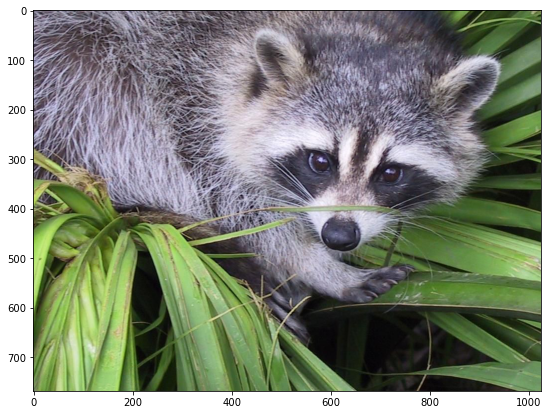

In [5]:
import scipy.misc
face = scipy.misc.face()
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(face)
plt.show()


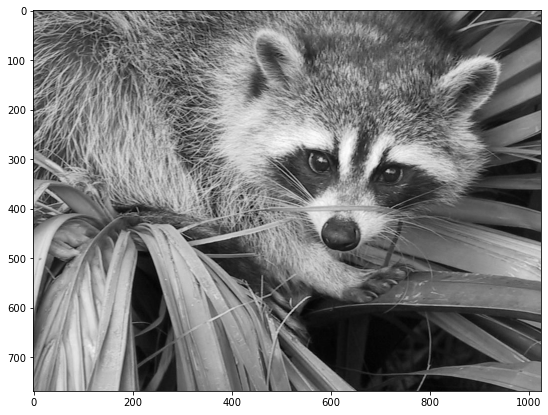

In [6]:
f = misc.face(gray=True)  # retrieve a grayscale image
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)


(-0.5, 1023.5, 767.5, -0.5)

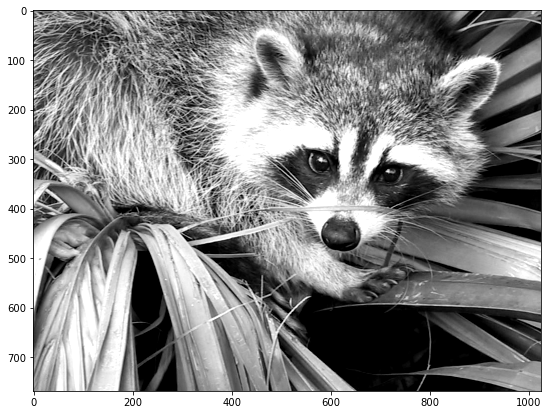

In [7]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        

# Remove axes and ticks
plt.axis('on')


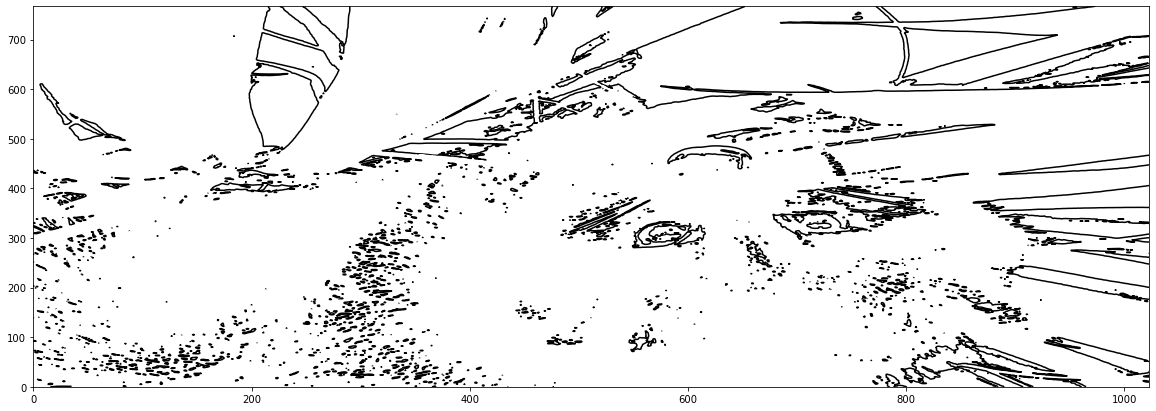

In [8]:
plt.contour(f, [50,200])  


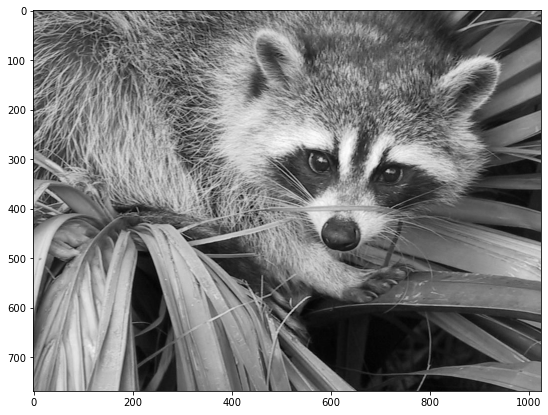

In [9]:
face = misc.face(gray=True)
lx, ly = face.shape
plt.imshow(face)

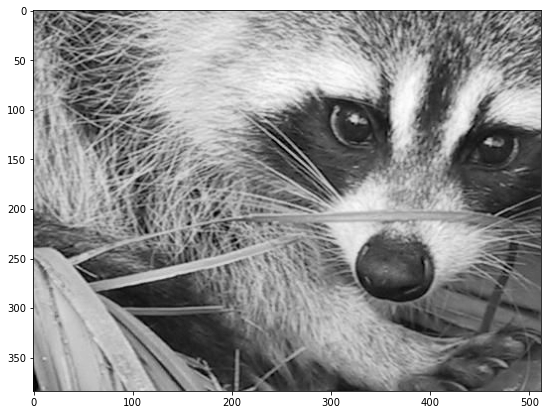

In [10]:
# Cropping
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
plt.imshow(crop_face)

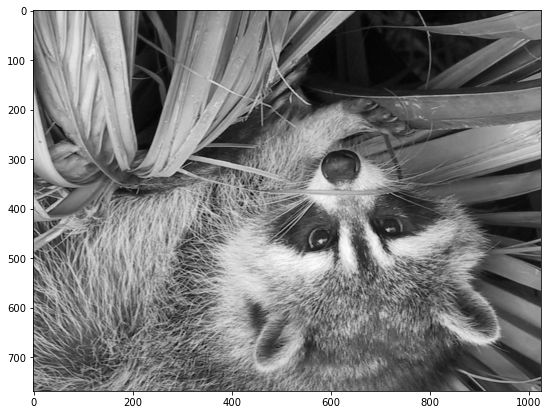

In [11]:
# up <-> down flip
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face)

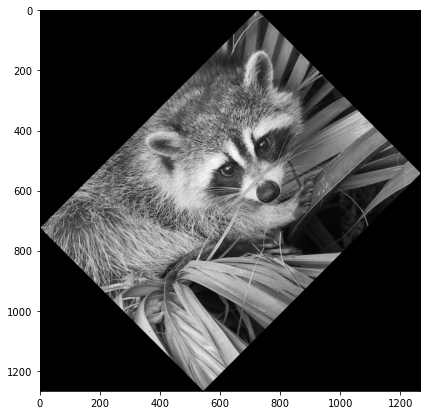

In [12]:
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 95, reshape=False)
plt.imshow(rotate_face)

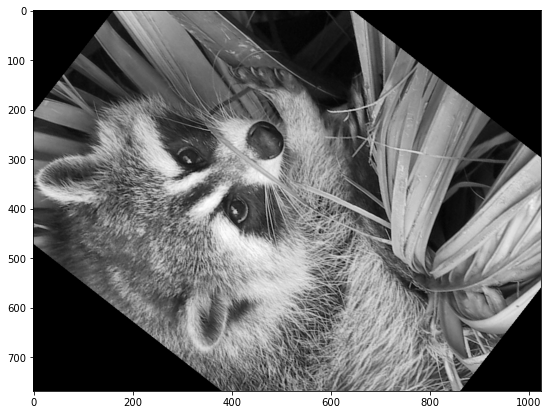

In [13]:
rotate_face_noreshape = ndimage.rotate(face, 142, reshape=False)
plt.imshow(rotate_face_noreshape)

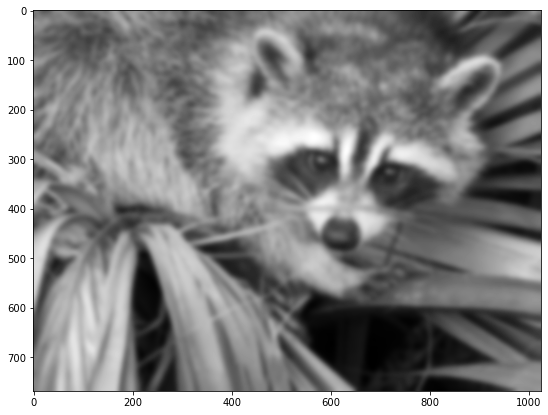

In [14]:
face = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(face, 5)
plt.imshow(blurred_f)

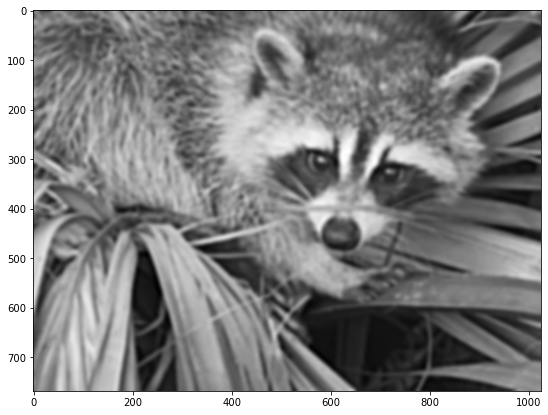

In [15]:
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 50
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
plt.imshow(sharpened)

In [16]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')


In [17]:
imsize = f.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( f[i:(i+8),j:(j+8)] )


In [18]:
f

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [19]:
imsize

(768, 1024)

In [20]:
dct

array([[ 9.70750000e+02, -1.30010747e+02, -1.87113768e+01, ...,
        -2.30771954e-01, -1.92991459e-01, -4.90159606e-02],
       [ 3.45432380e+01,  2.92930355e+01, -5.30421028e+01, ...,
        -1.56660707e-01, -6.38325391e-02,  6.76495125e-02],
       [ 5.61573441e+00, -2.99333081e+01,  4.11310967e+01, ...,
         2.51389586e-01, -1.76776695e-01,  4.10378171e-01],
       ...,
       [-1.89904721e-01,  2.06250817e-01, -2.01852146e-01, ...,
        -3.83203706e-02, -1.73564505e-01, -1.63320371e-01],
       [-6.37691830e-01,  1.79549815e-01,  4.63388348e-01, ...,
         0.00000000e+00, -3.53553391e-01,  0.00000000e+00],
       [ 3.16478567e-01, -2.70965939e-02, -6.44303593e-02, ...,
         1.34563247e-02, -4.10484409e-01,  5.73504875e-02]])

Text(0.5, 1.0, 'An 8x8 Image block')

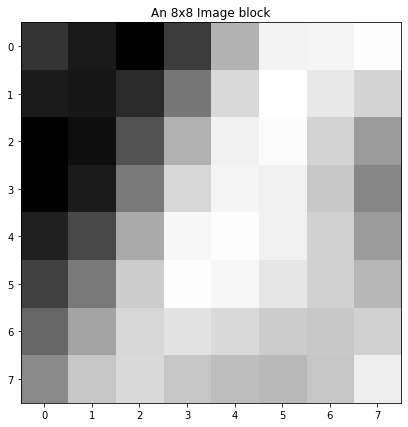

In [21]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(f[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")


Text(0.5, 1.0, 'An 8x8 DCT block')

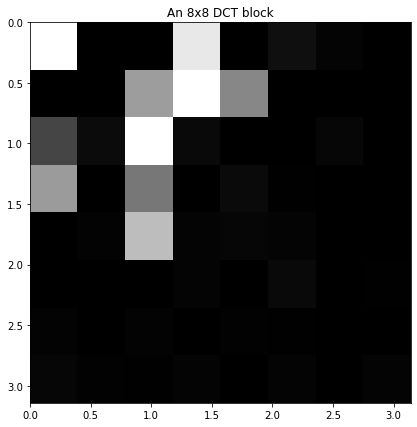

In [22]:
# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")


Text(0.5, 1.0, '8x8 DCTs of the image')

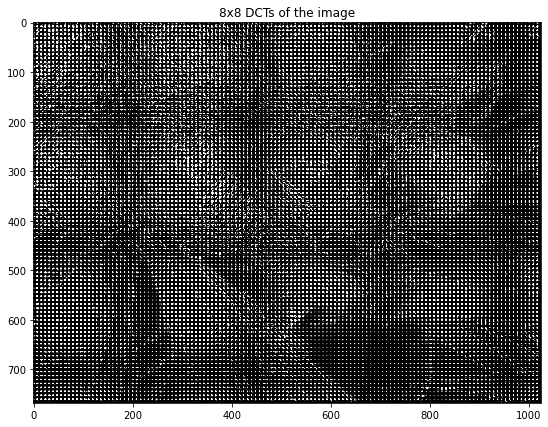

In [23]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")


Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

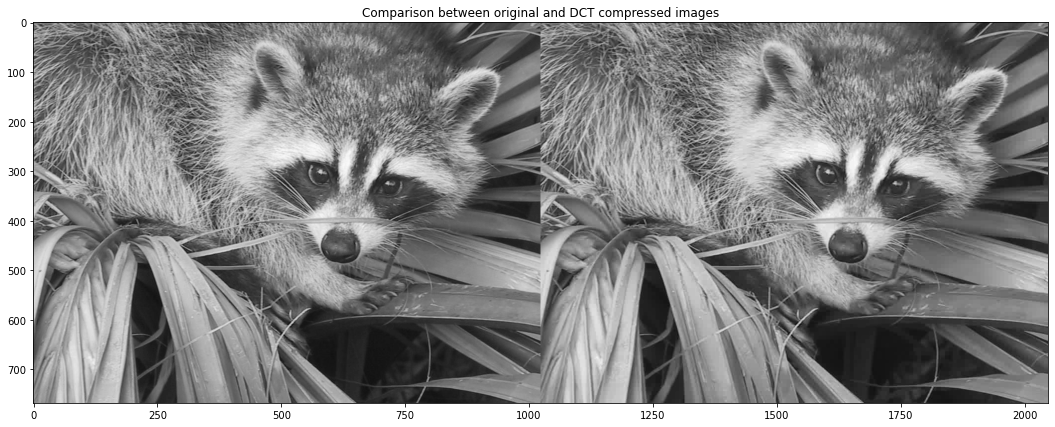

In [24]:
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (f, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )
